## usando las 10 variables mas importantes mas la edad

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       381
           1       0.96      0.92      0.94       419

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

Confusion Matrix:
[[363  18]
 [ 33 386]]


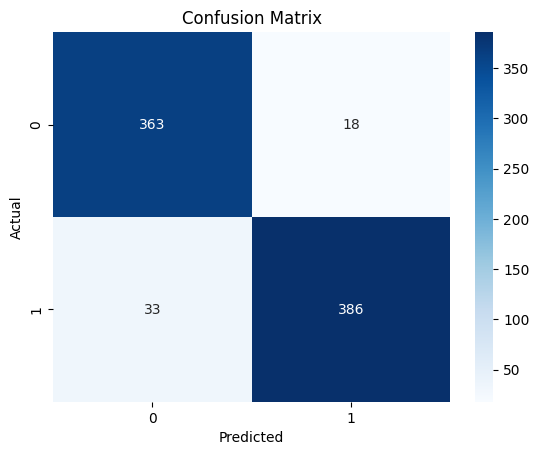

ROC-AUC Score: 0.99


In [1]:
import pandas as pd 

# Carga de los datos
url = 'https://raw.githubusercontent.com/ElvisMan2/taller_movil/main/Chronic_Kidney_Dsease_data_new.csv'
data = pd.read_csv(url)

# Eliminar las columnas 'PatientID' y 'DoctorInCharge' del DataFrame
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

# Importar train_test_split para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importar StandardScaler para estandarizar las características
from sklearn.preprocessing import StandardScaler

# Importar RandomForestClassifier para crear un modelo de clasificación usando Random Forest
from sklearn.ensemble import RandomForestClassifier

# Importar métricas para evaluar el rendimiento del modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Importar SMOTE para aplicar sobremuestreo a las clases minoritarias
from imblearn.over_sampling import SMOTE

# Importar matplotlib.pyplot para crear gráficos
import matplotlib.pyplot as plt

# Importar seaborn para visualizaciones de datos
import seaborn as sns

# Lista de las 10 variables más importantes (según tus resultados)
top_features = [
    'SerumCreatinine',
    'GFR',
    'ProteinInUrine',
    'Itching',
    'MuscleCramps',
    'SerumElectrolytesSodium',
    'BUNLevels',
    'FastingBloodSugar',
    'HbA1c',
    'HealthLiteracy',
    'Age'
]


# Separar las características (X) y la variable objetivo (y)
 # Filtrar X con solo esas columnas
X = data[top_features]
y = data['Diagnosis']

# Crear una instancia de StandardScaler para estandarizar las características
scaler = StandardScaler()

# Ajustar el escalador y transformar las características
X_scaled = scaler.fit_transform(X)

# Crear una instancia de SMOTE para aplicar sobremuestreo a las clases minoritarias
smote = SMOTE(random_state=42)

# Aplicar SMOTE para equilibrar las clases en el conjunto de datos
X_res, y_res = smote.fit_resample(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Crear una instancia de RandomForestClassifier con un estado aleatorio fijo para reproducibilidad
rf_model = RandomForestClassifier(random_state=42)

# Ajustar el modelo RandomForestClassifier usando los datos de entrenamiento *
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba *
y_pred = rf_model.predict(X_test)

# Imprimir el informe de clasificación para evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión para analizar los errores de clasificación
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calcular el puntaje ROC-AUC usando las probabilidades de predicción del modelo RandomForest
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Imprimir el puntaje ROC-AUC
print(f"ROC-AUC Score: {roc_auc:.2f}")


In [5]:
print("datos reales")
print (y_test.to_numpy())

print("Predicciones de y_test:")
print(y_pred)



datos reales
[0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 0 0